### New York Times
Each one represents one (simulated) day’s worth of ads shown and clicks recorded on the New York Times home page in May 2012.
https://github.com/oreillymedia/doing_data_science

Take a look at Minority Report's clip.

In [1]:
# Take a look at nyt1.csv first!!!

In [2]:
import pandas as pd

data = pd.read_csv("nyt1.csv")
data.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [3]:
print(data.shape)
data.head()

(458441, 5)


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139F50D4E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000139F55E97B8>]], dtype=object)

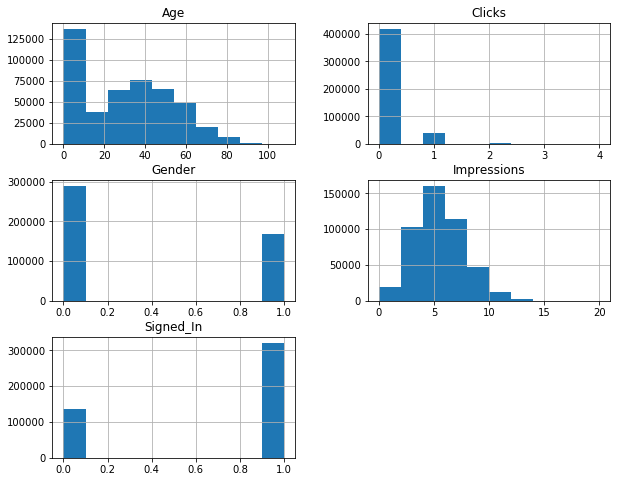

In [4]:
%pylab inline
data.hist(figsize=(10,8))

### EDA
Waht is the problem above?

In [5]:
#hist?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139F5936CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000139F5809080>]], dtype=object)

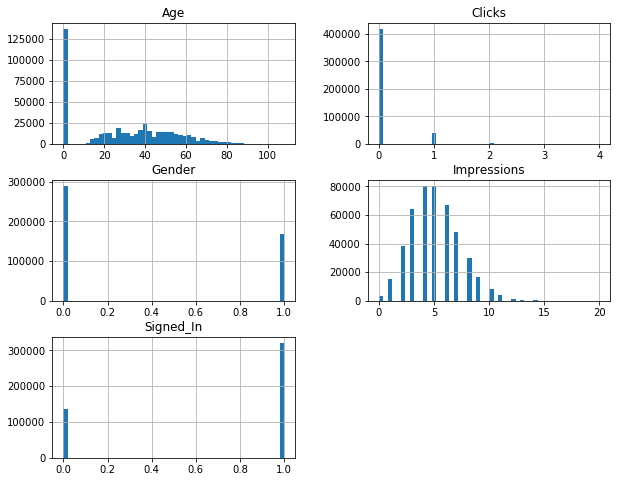

In [6]:
data.hist(figsize=(10,8), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139F5A2F5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000139F5D3D2B0>]], dtype=object)

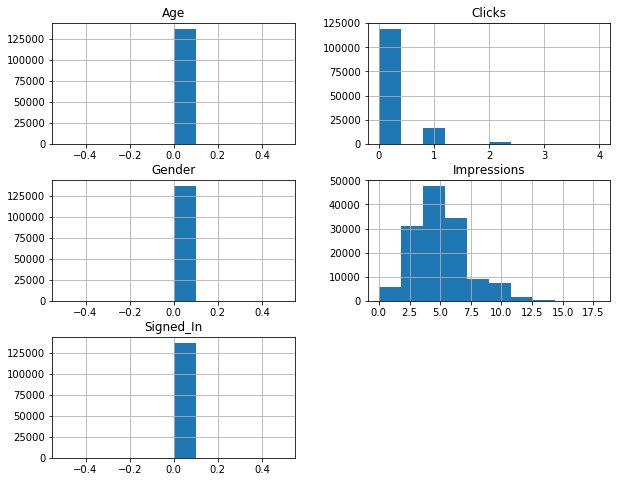

In [7]:
data.loc[lambda df: df["Signed_In"] == 0, :].hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139F6B60710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000139F6A559E8>]], dtype=object)

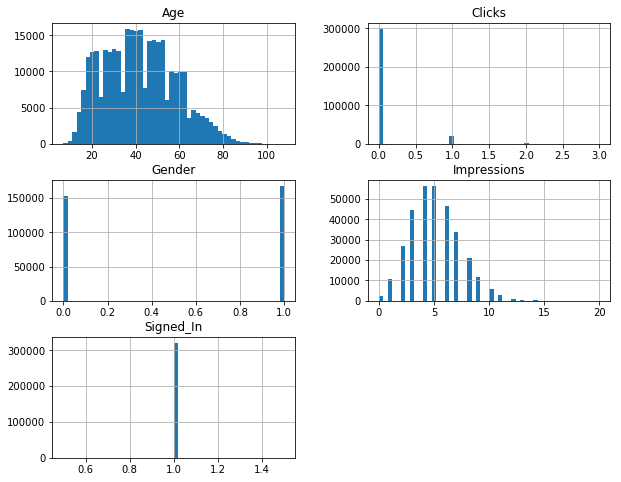

In [8]:
data.loc[lambda df: df["Signed_In"] == 1, :].hist(figsize=(10,8), bins=50)

### EDA

In [9]:
data1 = data[data.Impressions > 0]

data1['CTR'] = data1['Clicks']/ data1["Impressions"]
data1['AgeGroup'] = pd.cut(data1['Age'], [-1, 0, 18, 24, 34, 44, 54, 64, 100], retbins = False)
data1.head()

C:\Users\hsiao\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\hsiao\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Gender,Impressions,Clicks,Signed_In,CTR,AgeGroup
0,36,0,3,0,1,0.0,"(34, 44]"
1,73,1,3,0,1,0.0,"(64, 100]"
2,30,0,3,0,1,0.0,"(24, 34]"
3,49,1,3,0,1,0.0,"(44, 54]"
4,47,1,11,0,1,0.0,"(44, 54]"


In [10]:
print(data1.shape)
data1.describe()

(455375, 7)


,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,455375.000000,455375.000000,455375.000000,455375.000000,455375.000000,455375.000000
mean,29.484010,0.367051,5.041030,0.093218,0.700956,0.018471
std,23.606697,0.482001,2.208731,0.310922,0.457839,0.069034
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000,0.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000,1.000000


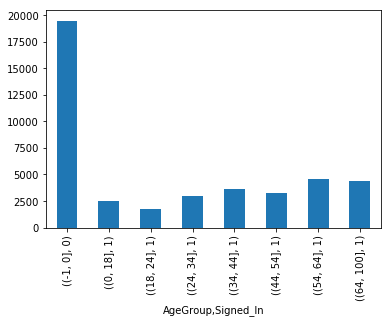

In [11]:
impressionsByAgeSignIn = data1.groupby(['AgeGroup','Signed_In'])['Clicks'].sum()
impressionsByAgeSignIn.plot(kind='bar')

In [12]:
loggedInCTRsByAgeGroup = data1[(data1.CTR > 0) & (data1.Signed_In > 0)].groupby('AgeGroup').CTR
loggedInCTRsByAgeGroup.describe()

AgeGroup        
(-1, 0]    count       0.000000
           mean             NaN
           std              NaN
           min              NaN
           25%              NaN
           50%              NaN
           75%              NaN
           max              NaN
(0, 18]    count    2371.000000
           mean        0.214738
           std         0.122203
           min         0.058824
           25%         0.142857
           50%         0.200000
           75%         0.250000
           max         1.000000
(18, 24]   count    1669.000000
           mean        0.203926
           std         0.116896
           min         0.066667
           25%         0.125000
           50%         0.166667
           75%         0.250000
           max         1.000000
(24, 34]   count    2870.000000
           mean        0.204344
           std         0.111438
           min         0.066667
           25%         0.142857
           50%         0.166667
                       